<h2 style = "color: Red">Naive Bayes</h2>
<b>This section is to learn about Naive Bayes and make the classifier from scratch. I used the Iris Dataset imported from seaborn to test and train my model</b>

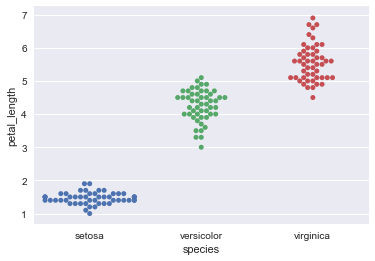

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


iris = sns.load_dataset("iris")
sns.set()
%matplotlib inline

sns.swarmplot(x="species", y="petal_length", data = iris)

iris_list = iris.values.tolist()


In [6]:
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi

#convert string column to float
def str_column_to_float(dataset , column):
    for row in dataset:
        row[column] = float(row[column].strip())
        
#convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        print('[%s] => %d'%(value,i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

#Split the dataset by class value, returns a dictionary

def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if(class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers])/float(len(numbers)-1)
    return sqrt(variance)
def summarize_dataset(dataset):
    summaries = [mean(column),stdev(column), len(column)]
    del(summaries[-1])
    return summaries

def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value,row in separated.items():
        summaries[class_value] = summarize_dataset(dataset[row])
    return summaries
def calculate_probability(x,mean,stdev):
    exponent = exp(-((x-mean)**2/(2*stdeb**2)))
    return (1/(sqrt(2*pi)*stdev))*exponent
def calculate_class_probabilities(summaries,row):
    
    